<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/04_Simulando_CARTEIRA_DE_A%C3%87%C3%95ES_e_comparando_com_o_IBOVESPA_Python_para_Investimentos_com_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ricos pelo Acaso

Link para o vídeo: https://youtu.be/TiNLwmLN-iE

# 1. Importando bibliotecas

In [0]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Obtendo e tratando os dados

In [4]:
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA"

carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [31]:
carteira.dropna(inplace=True)
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2015-04-30,16.423456,5.743111,5.824075,19.788538,11.095176
2015-05-04,16.761456,5.797244,6.243565,21.649445,11.482473
2015-05-05,16.960794,5.727955,6.487454,23.641405,11.627790
2015-05-06,17.194796,5.668414,6.799632,21.780497,11.503244
2015-05-07,16.908794,5.704138,6.116742,20.863142,11.524017
...,...,...,...,...,...
2020-04-24,11.110000,8.400000,4.324811,43.759998,38.709999
2020-04-27,11.610000,8.670000,4.324811,44.549999,40.599998
2020-04-28,11.700000,9.280000,4.693516,44.610001,41.580002


In [32]:
ibov.dropna(inplace=True)
ibov

Date
2015-04-30    56229.0
2015-05-04    57354.0
2015-05-05    58052.0
2015-05-06    57103.0
2015-05-07    56921.0
               ...   
2020-04-24    75331.0
2020-04-27    78239.0
2020-04-28    81312.0
2020-04-29    83171.0
2020-04-30    80506.0
Name: Adj Close, Length: 1236, dtype: float64

# 3. Resultados

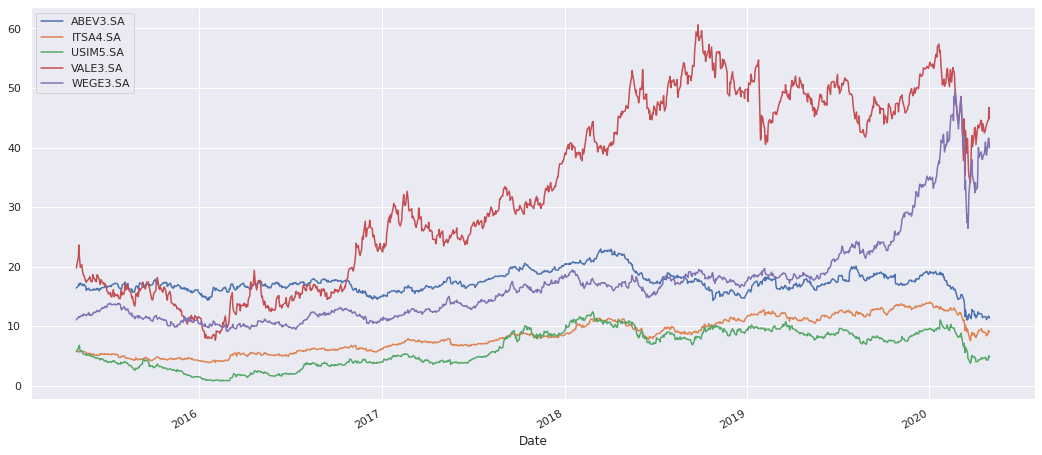

In [33]:
sns.set()
carteira.plot(figsize=(18,8));

In [0]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

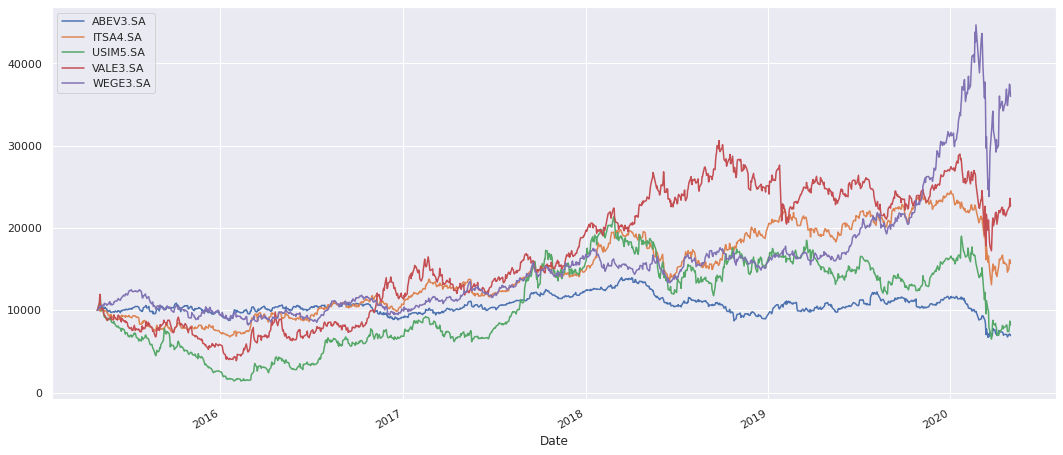

In [35]:
carteira_normalizada.plot(figsize=(18,8));

In [0]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [37]:
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2015-04-30,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2015-05-04,10205.802810,10094.256336,10720.269495,10940.396205,10349.068495,52309.793341
2015-05-05,10327.177331,9973.610484,11139.029325,11947.019598,10480.041705,53866.878443
2015-05-06,10469.657183,9869.935488,11675.042595,11006.622430,10367.789268,53389.046964
2015-05-07,10295.515271,9932.138991,10502.513106,10543.043673,10386.511760,51659.722802
...,...,...,...,...,...,...
2020-04-24,6764.714763,14626.218130,7425.747730,22113.810716,34889.036443,85819.527782
2020-04-27,7069.157381,15096.347388,7425.747730,22513.032183,36592.478942,88696.763625
2020-04-28,7123.957145,16158.488870,8058.817895,22543.353459,37475.748734,91360.366103


In [38]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2015-04-30    50000.000000
2015-05-04    51000.373473
2015-05-05    51621.049636
2015-05-06    50777.179036
2015-05-07    50615.340838
                  ...     
2020-04-24    66985.896957
2020-04-27    69571.751232
2020-04-28    72304.326949
2020-04-29    73957.388536
2020-04-30    71587.614932
Name: Adj Close, Length: 1236, dtype: float64

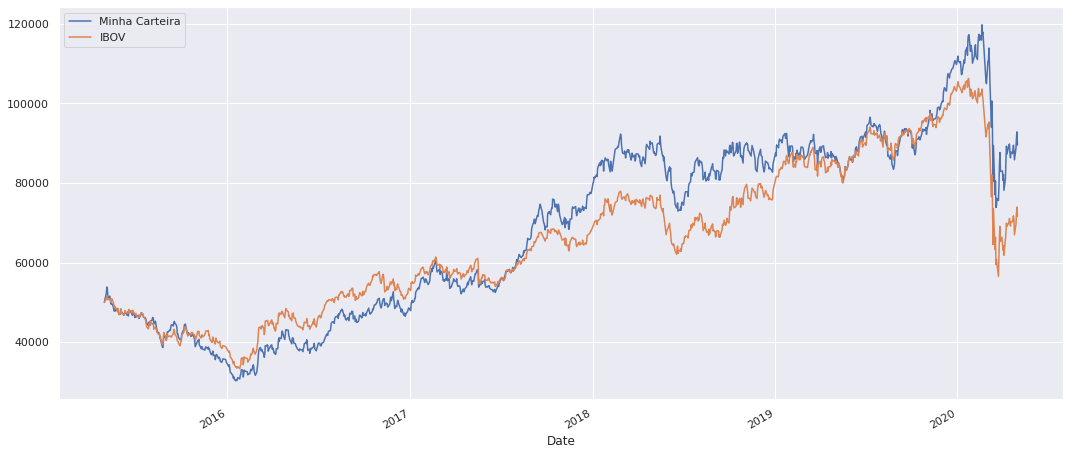

In [28]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [39]:
carteira_normalizada.describe()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,10574.997819,14672.692166,10804.871196,16763.735067,15389.544682,68205.840931
std,1138.884193,4975.082482,5159.649028,7543.305331,6719.809584,22414.986674
min,6716.003991,6776.612881,1423.785632,3873.191271,8219.120717,30259.809381
25%,9976.533051,10164.376736,6599.665383,8597.541440,10668.417979,46995.255026
50%,10469.017856,14273.083997,11961.757725,15883.660680,14366.961532,72506.958336
75%,11106.624017,19241.043203,15289.662166,24035.221375,16686.467021,87368.086200
max,13988.696053,24519.373968,21356.785713,30620.938452,44691.387886,119744.959464
